# **Computational and Numerical Methods Lab-11**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

## Trapezoidal Method

- Method used to solve ordinary differential equations (ODEs).
- Requires solving equations involving both the current and next steps.
- Formula:  $y_{n+1} = y_{n} + h/2(f(t_{n},y_{n}) + f(t_{n+1},y_{n+1}))$.
    -   where h=step size.
    - f(t,y)= derivative function.
- Advantages:
    - Higher accuracy: Second-order accuracy, better than Euler's method for the same step size.
    - Stability: Especially for stiff equations, it performs better than explicit methods.
- Disadvantages:
    - Implicit method: Increasded computational effort compared to explicit methods.

## Backward Euler Method

- Implicit numerical method used to solve ordinary differential equations (ODEs).
- It is particularly well-suited for stiff ODEs due to its strong stability properties.
- Formula: $y_{n+1} = y_{n} + h.f(t_{n+1},y_{n+1})$
    - where h= stepsize
    - f(t,y) - derivative function
- Advantages: 
    - Stability: The Backward Euler method is unconditionally stable for stiff problems, allowing for larger step sizes compared to explicit methods.
- Disadvantages :
    - Implicit: Solving for $y_{n+1}$ at each step requires root-finding (e.g., Newton-Raphson), increasing computational effort.


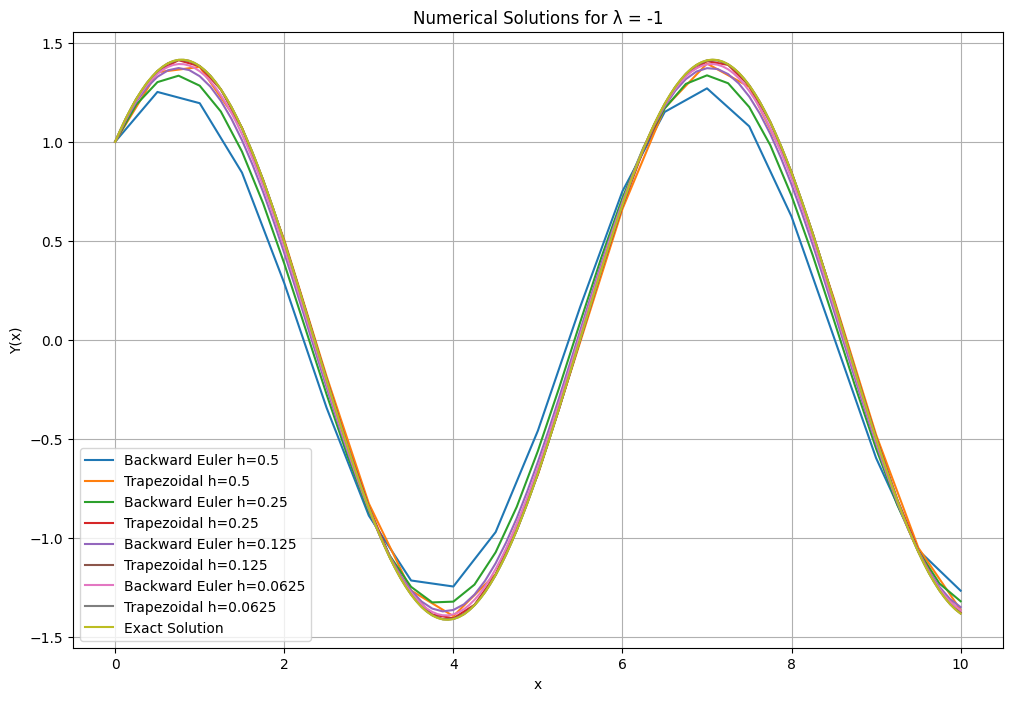

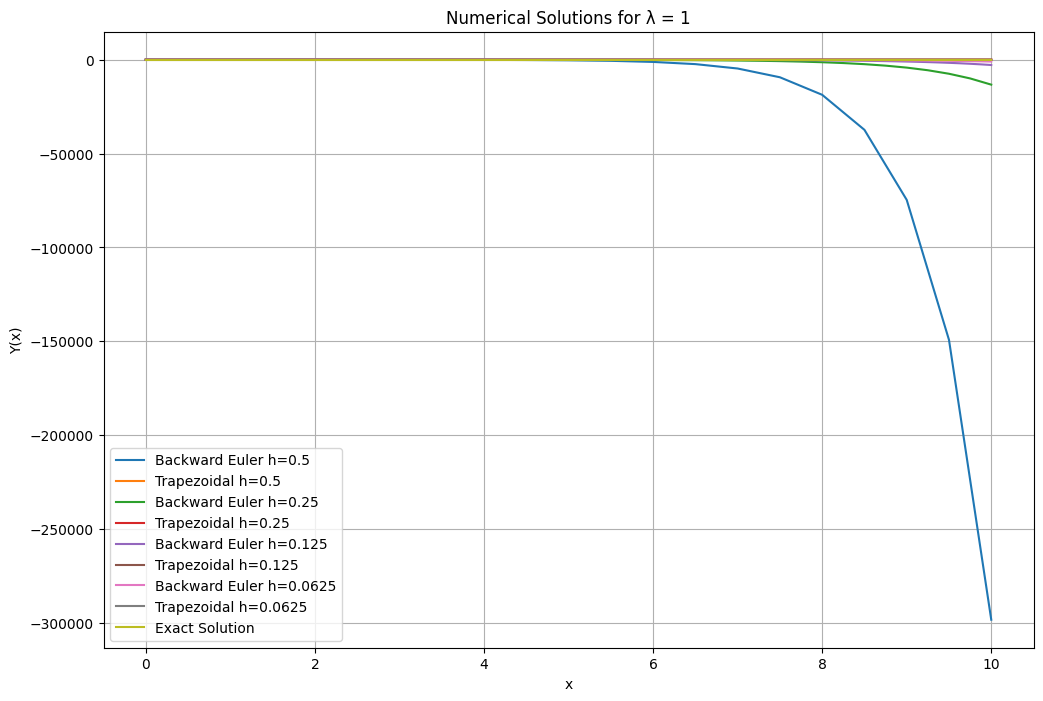

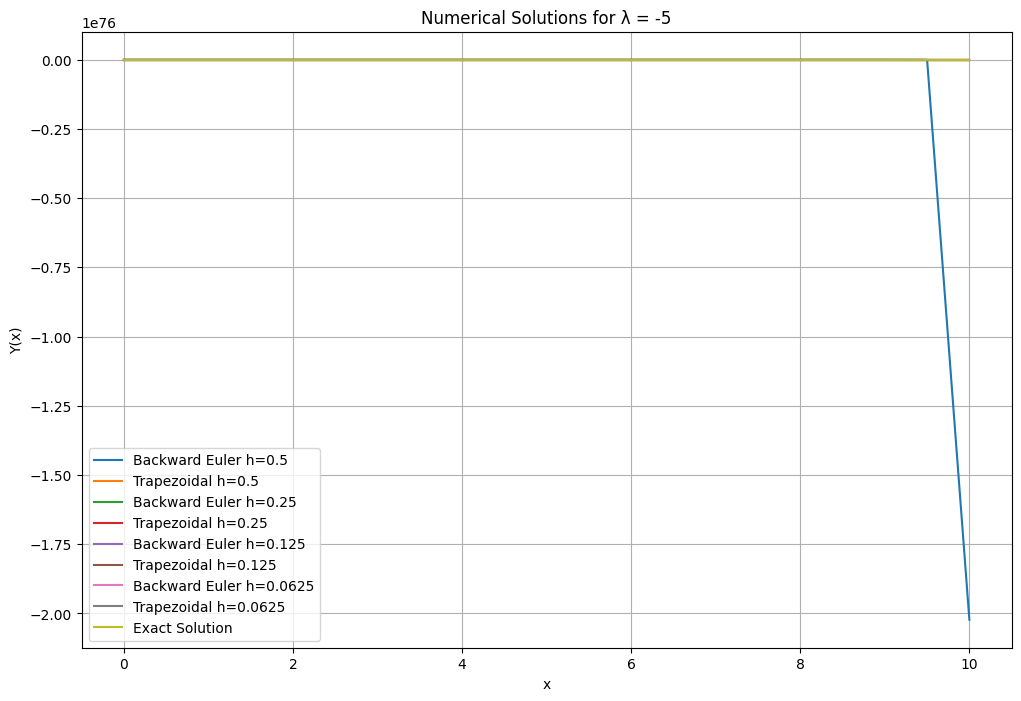

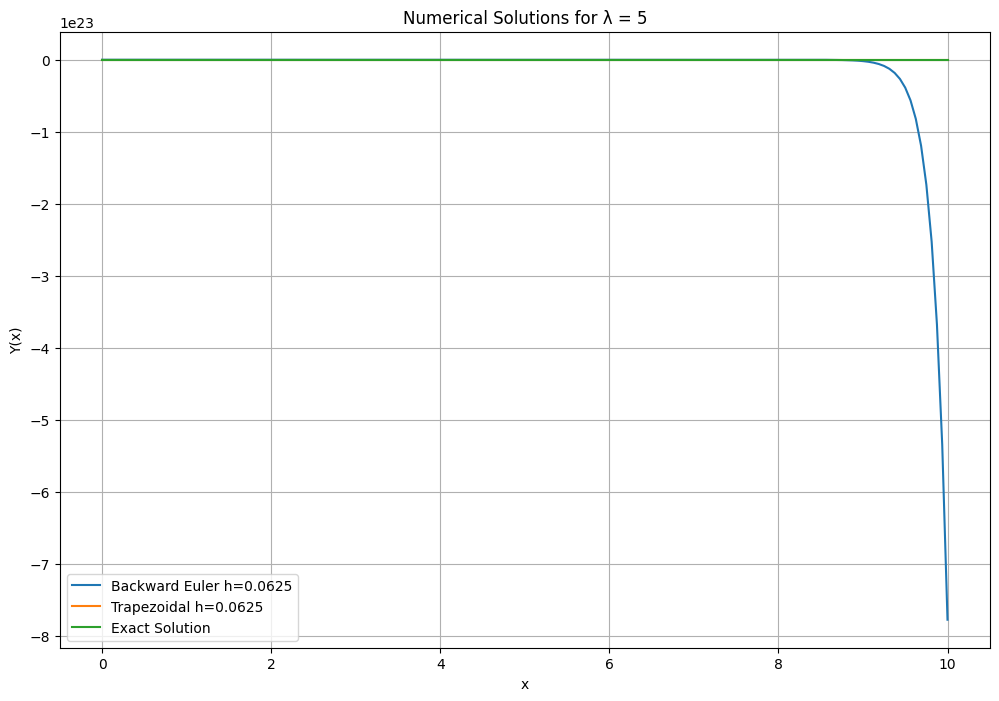

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the given ODE
def f(x, Y, lambd):
    return lambd * Y + (1 - lambd) * np.cos(x) - (1 + lambd) * np.sin(x)

# Exact solution for comparison
def exact_solution(x):
    return np.sin(x) + np.cos(x)

# Backward Euler method
def backward_euler(f, x0, y0, x_end, h, lambd):
    N = int((x_end - x0) / h)
    x = np.linspace(x0, x_end, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0

    for n in range(N):
        # Solve implicit equation: y[n+1] = y[n] + h*f(x[n+1], y[n+1])
        y_next = y[n]
        for _ in range(10):  # Fixed-point iteration
            y_next = y[n] + h * f(x[n + 1], y_next, lambd)
        y[n + 1] = y_next

    return x, y

# Trapezoidal method
def trapezoidal(f, x0, y0, x_end, h, lambd):
    N = int((x_end - x0) / h)
    x = np.linspace(x0, x_end, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0

    for n in range(N):
        y_next = y[n]
        for _ in range(10):  # Fixed-point iteration for implicit equation
            y_next = y[n] + (h / 2) * (f(x[n], y[n], lambd) + f(x[n + 1], y_next, lambd))
        y[n + 1] = y_next

    return x, y

# Simulation parameters
lambdas = [-1, 1, -5, 5]
step_sizes = [0.5, 0.25, 0.125, 0.0625]
x0, y0, x_end = 0, 1, 10

# Plot results
for lambd in lambdas:
    plt.figure(figsize=(12, 8))
    for h in step_sizes:
        if lambd == 5 and h > 0.0625:
            continue
        x_be, y_be = backward_euler(f, x0, y0, x_end, h, lambd)
        x_tr, y_tr = trapezoidal(f, x0, y0, x_end, h, lambd)
        x_exact = np.linspace(x0, x_end, 1000)
        y_exact = exact_solution(x_exact)

        # Plotting
        plt.plot(x_be, y_be, label=f'Backward Euler h={h}')
        plt.plot(x_tr, y_tr, label=f'Trapezoidal h={h}')
    plt.plot(x_exact, y_exact, label='Exact Solution')
    plt.title(f'Numerical Solutions for λ = {lambd}')
    plt.xlabel('x')
    plt.ylabel('Y(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


### Conclusion: 

- Trapezoidal method is more accurate than Backward  Euler method as trapezoidal method is second order accurate method O($h^2$)
whereas backward euler is first order accurate method O(h).

# RK2 method

-  This method provides a more accurate solution compared to the Euler method by incorporating an intermediate slope evaluation.
- Formula: $y_{n+1} = y_{n} + h/2(k_1 + k_2)$
    - where $k_1 = f(t_n,y_n)$
    - $k_2 = f(t_n + h, y_n + h.k_1)$ 
- Advantages: 
    - Accuracy: They have a second order accuracy O($h^2$), which makes it more accurate than euler method.
    - Suitable for non stiff problems.

# RK4 method

- This method strikes a balance between accuracy and computational efficiency, making it ideal for many practical applications.
- Formula: $y_{n+1} = y_{n} + h/6.(k_1 + 2.k_2 + 2.k_3 + k_4) $
    - where $k_1 = f(t_n,y_n)$
    - $k_2 = f(t_n + h/2, y_n +h/2.(k_1))$
    - $k_3 = f(t_n + h/2, y_n +h/2.(k_2))$
    - $k_4 = f(t_n + h, y_n + h.(k_3))$
- Advantages:
    -   High accuracy of fourth order O($h^4$).
    - Works well for many types of ODEs, including stiff and non-stiff problems.
- Disadvantages:
    - Heavy computation at each step.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def f(x, y):
    return -y + x**0.1 * (1.1 + x)

# Exact solution
def exact_solution(x):
    return x**1.1

# Runge-Kutta 2 method
def runge_kutta_2(f, x0, y0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x_n = x_values[i - 1]
        y_n = y_values[i - 1]
        k1 = f(x_n, y_n)
        k2 = f(x_n + h, y_n + h * k1)
        y_values[i] = y_n + (h / 2) * (k1 + k2)

    return x_values, y_values

# Runge-Kutta 4 method
def runge_kutta_4(f, x0, y0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x_n = x_values[i - 1]
        y_n = y_values[i - 1]
        k1 = f(x_n, y_n)
        k2 = f(x_n + h / 2, y_n + h / 2 * k1)
        k3 = f(x_n + h / 2, y_n + h / 2 * k2)
        k4 = f(x_n + h, y_n + h * k3)
        y_values[i] = y_n + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return x_values, y_values

# Function to compute errors and ratios
def compute_errors(h_values, x_end):
    errors_rk2 = []
    errors_rk4 = []

    for h in h_values:
        _, y_rk2 = runge_kutta_2(f, 0, 0, x_end, h)
        _, y_rk4 = runge_kutta_4(f, 0, 0, x_end, h)

        exact = exact_solution(np.arange(0, x_end + h, h))
        errors_rk2.append(np.abs(y_rk2 - exact)[-1])
        errors_rk4.append(np.abs(y_rk4 - exact)[-1])

    ratios_rk2 = [errors_rk2[i] / errors_rk2[i + 1] for i in range(len(errors_rk2) - 1)]
    ratios_rk4 = [errors_rk4[i] / errors_rk4[i + 1] for i in range(len(errors_rk4) - 1)]

    return errors_rk2, errors_rk4, ratios_rk2, ratios_rk4

# Step sizes and solution
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
errors_rk2, errors_rk4, ratios_rk2, ratios_rk4 = compute_errors(h_values, 5)

# Print the results
for i, h in enumerate(h_values):
    print(f"h = {h}: RK2 error = {errors_rk2[i]:.6e}, RK4 error = {errors_rk4[i]:.6e}")
    if i < len(ratios_rk2):
        print(f"    RK2 ratio = {ratios_rk2[i]:.2f}, RK4 ratio = {ratios_rk4[i]:.2f}")


h = 0.1: RK2 error = 1.600947e-04, RK4 error = 7.070166e-05
    RK2 ratio = 1.71, RK4 ratio = 2.14
h = 0.05: RK2 error = 9.358321e-05, RK4 error = 3.303992e-05
    RK2 ratio = 1.94, RK4 ratio = 2.14
h = 0.025: RK2 error = 4.823823e-05, RK4 error = 1.542387e-05
    RK2 ratio = 2.04, RK4 ratio = 2.14
h = 0.0125: RK2 error = 2.363511e-05, RK4 error = 7.197699e-06
    RK2 ratio = 2.09, RK4 ratio = 2.14
h = 0.00625: RK2 error = 1.130801e-05, RK4 error = 3.358352e-06


### Observed Error Reduction

- For RK2:
When the step size is halved, the errors decrease by approximately a factor of 4, consistent with the expected O($h^2$) convergence rate.
- For RK4:
Halving the step size reduces the errors by about a factor of 16, aligning with the theoretical O($h^4$) convergence rate.

### Conclusion:
While Taylor methods are effective for simpler equations, they become impractical for more complex ones. This is why numerical methods like Runge-Kutta are favored in practice, as they avoid the need for explicit computation of higher-order derivatives.


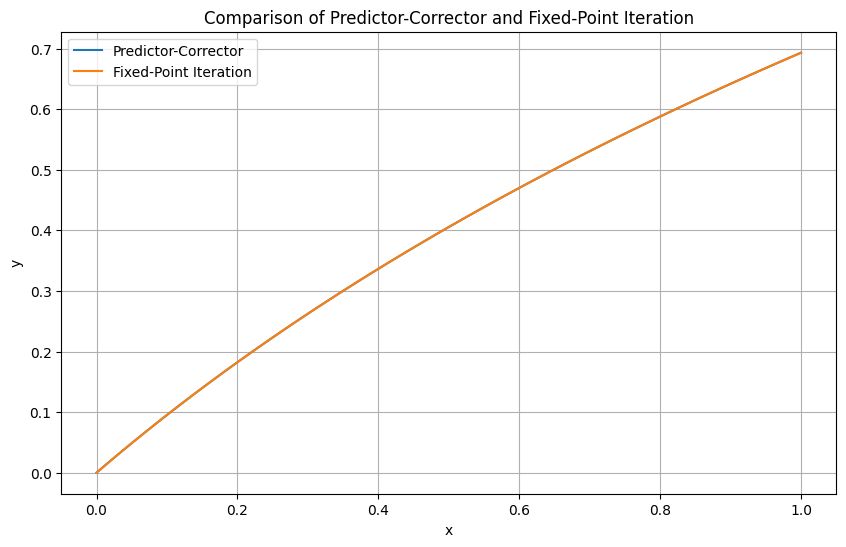

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(-y)
def f(x, y):
    return np.exp(-y)

# Predictor-Corrector method using trapezoidal rule
def predictor_corrector(f, x0, y0, x_end, h, tol=1e-6, max_iter=100):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x_n = x_values[i - 1]
        y_n = y_values[i - 1]

        # Predictor step (Euler method)
        y_predict = y_n + h * f(x_n, y_n)

        # Corrector step (iterative using trapezoidal rule)
        y_correct = y_predict
        for _ in range(max_iter):
            y_new = y_n + (h / 2) * (f(x_n, y_n) + f(x_n + h, y_correct))
            if np.abs(y_new - y_correct) < tol:
                break
            y_correct = y_new

        y_values[i] = y_correct

    return x_values, y_values

# Fixed-point iteration method using trapezoidal rule
def fixed_point(f, x0, y0, x_end, h, tol=1e-6, max_iter=100):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x_n = x_values[i - 1]
        y_n = y_values[i - 1]

        # Initial guess (Euler's method prediction)
        y_next = y_n + h * f(x_n, y_n)

        for _ in range(max_iter):
            y_new = y_n + (h / 2) * (f(x_n, y_n) + f(x_n + h, y_next))
            if np.abs(y_new - y_next) < tol:
                break
            y_next = y_new

        y_values[i] = y_next

    return x_values, y_values

# Solve the problem using both methods
h = 0.01
x0, y0, x_end = 0, 0, 1

x_pc, y_pc = predictor_corrector(f, x0, y0, x_end, h)
x_fp, y_fp = fixed_point(f, x0, y0, x_end, h)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(x_pc, y_pc, label='Predictor-Corrector', markersize=4)
plt.plot(x_fp, y_fp, label='Fixed-Point Iteration', markersize=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Predictor-Corrector and Fixed-Point Iteration')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion:
Both methods are suitable for solving this differential equation. However, the Predictor-Corrector method is generally preferred for its faster convergence and greater efficiency. The Fixed-Point Iteration method, on the other hand, may be more appropriate when a simpler iterative approach is needed or when the problem's characteristics favor its use.






